In [1]:
import sys
sys.path.append('../src')

# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

from utils import load_train_data

# Load training data
train_data = load_train_data(local=True)

/tmp/ipykernel_29515/687638944.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<Axes: title={'center': 'Number of Buildings with Each Damage Grade'}, xlabel='damage_grade'>

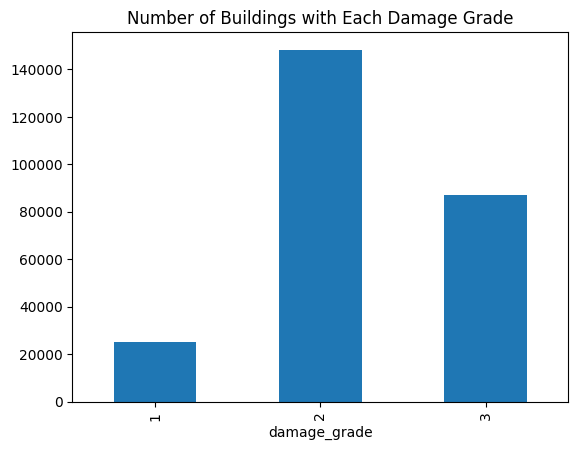

In [2]:
(train_data.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

In [4]:
sns.pairplot(train_values_subset, 
             hue='damage_grade')

In [5]:
# group by all has_secondary_use* columns and damage_grade and plot
has_secondary_use_cols = [col for col in train_data.columns if 'has_secondary_use' in col]
has_secondary_use_cols.append('damage_grade')
has_secondary_use_cols = train_data[has_secondary_use_cols]
has_secondary_use_cols = has_secondary_use_cols.groupby('damage_grade').sum().T

fig = go.Figure()
for damage_grade in has_secondary_use_cols.columns:
    fig.add_trace(go.Bar(name=damage_grade, x=has_secondary_use_cols.index, y=has_secondary_use_cols[damage_grade]))

fig.update_layout(barmode='stack', title="Number of Buildings with Each Damage Grade by Secondary Use")
fig.show()


In [6]:
# save fig to png in ../graphics/secondary_use.png
fig.write_image("../graphics/secondary_use.png")
